
 # Multivariate Regression

## PETE 2061 Lab 10

<a id='top'></a>

<a id='overview'></a>
# Topics Covered
<font color=blue>
 * [Gulf of Mexico Fields Example](#GOM) 
 * [Reservoir Water Conductivity Example](#conductivity)
 * [Introduction to Machine Learning with Scikit Learn](#sklearn)    
</font>
<br>

## Load required python packages

In [100]:
import numpy as np
import scipy.stats as ss 
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline   
#In Jupyter notebook, this makes matplotlib.pyplot generate a plot even the first time plot() is called

<a id='GOM'></a>
## Import DataFrame from tables2006.csv
Download from Moodle the csv, makesure to download it to your user directory

This is an actual oil field data set from the Gulf of Mexico, so keep it real.

In [54]:
df = pd.read_csv('tables2006.csv', thousands=',') #The thousands command is to insure that the commas are eliminated from the columns that have them
df

,Rank,Field name,New field,Disc year,Water depth (feet),Field class,Field type,Field GOR (SCF/STB),Proved Oil (MMbbl),Proved Gas (Bcf),Proved BOE (MMbbl),Cum Oil (MMbbl),Cum Gas (Bcf),Cum BOE (MMbbl),Rem Oil (MMbbl),Rem Gas (Bcf),Rem BOE (MMbbl)
0,1.0,MC807,NaN,1989.0,3393.0,PDP,O,1444.0,1208.2,1745.2,1518.7,734.7,959.6,905.4,473.5,785.6,613.3
1,2.0,EI330,NaN,1971.0,247.0,PDP,O,4222.0,430.9,1819.5,754.7,420.3,1801.4,740.9,10.6,18.1,13.8
2,3.0,WD030,NaN,1949.0,48.0,PDP,O,1617.0,573.7,927.7,738.7,561.8,867.8,716.2,11.9,59.9,22.6
3,4.0,MC778,NaN,1999.0,6081.0,PU,O,776.0,642.7,498.4,731.4,0.0,0.0,0.0,642.6,498.4,731.3
4,5.0,GI043,NaN,1956.0,140.0,PDP,O,4302.0,377.3,1618.9,665.3,360.8,1537.1,634.3,16.5,81.8,31.0
5,6.0,MC776,*,2000.0,5662.0,PU,O,1058.0,534.0,565.2,634.5,0.0,0.0,0.0,534.0,565.2,634.5
6,7.0,BM002,NaN,1949.0,50.0,PDP,O,1037.0,530.3,549.9,628.1,522.5,536.5,618.0,7.7,13.4,10.1
7,8.0,GC743,*,1998.0,6468.0,PDP,O,647.0,558.6,361.4,623.0,0.0,0.0,0.0,558.6,361.4,622.9
8,9.0,TS000,NaN,1958.0,13.0,PDP,G,83526.0,38.3,3201.4,608.0,37.5,3155.0,598.8,0.9,46.4,9.1
9,10.0,VR014,NaN,1956.0,26.0,PDP,G,63983.0,48.2,3082.6,596.7,47.9,3055.7,591.6,0.3,26.8,5.1


## Data Cleaning
Line 50 is garbage so remove it

In [55]:
df = df.drop(50)
df

,Rank,Field name,New field,Disc year,Water depth (feet),Field class,Field type,Field GOR (SCF/STB),Proved Oil (MMbbl),Proved Gas (Bcf),Proved BOE (MMbbl),Cum Oil (MMbbl),Cum Gas (Bcf),Cum BOE (MMbbl),Rem Oil (MMbbl),Rem Gas (Bcf),Rem BOE (MMbbl)
0,1.0,MC807,NaN,1989.0,3393.0,PDP,O,1444.0,1208.2,1745.2,1518.7,734.7,959.6,905.4,473.5,785.6,613.3
1,2.0,EI330,NaN,1971.0,247.0,PDP,O,4222.0,430.9,1819.5,754.7,420.3,1801.4,740.9,10.6,18.1,13.8
2,3.0,WD030,NaN,1949.0,48.0,PDP,O,1617.0,573.7,927.7,738.7,561.8,867.8,716.2,11.9,59.9,22.6
3,4.0,MC778,NaN,1999.0,6081.0,PU,O,776.0,642.7,498.4,731.4,0.0,0.0,0.0,642.6,498.4,731.3
4,5.0,GI043,NaN,1956.0,140.0,PDP,O,4302.0,377.3,1618.9,665.3,360.8,1537.1,634.3,16.5,81.8,31.0
5,6.0,MC776,*,2000.0,5662.0,PU,O,1058.0,534.0,565.2,634.5,0.0,0.0,0.0,534.0,565.2,634.5
6,7.0,BM002,NaN,1949.0,50.0,PDP,O,1037.0,530.3,549.9,628.1,522.5,536.5,618.0,7.7,13.4,10.1
7,8.0,GC743,*,1998.0,6468.0,PDP,O,647.0,558.6,361.4,623.0,0.0,0.0,0.0,558.6,361.4,622.9
8,9.0,TS000,NaN,1958.0,13.0,PDP,G,83526.0,38.3,3201.4,608.0,37.5,3155.0,598.8,0.9,46.4,9.1
9,10.0,VR014,NaN,1956.0,26.0,PDP,G,63983.0,48.2,3082.6,596.7,47.9,3055.7,591.6,0.3,26.8,5.1


## Check out your column keys (aka column titles) for future reference, they are really handy to cut and paste in future indexing calls

In [56]:
df.keys()

Index(['Rank', 'Field    name', 'New  field', 'Disc          year',
       'Water  depth  (feet)', 'Field class', 'Field   type',
       'Field               GOR (SCF/STB)   ', '        Proved Oil (MMbbl)',
       'Proved Gas (Bcf)', 'Proved BOE (MMbbl)', 'Cum Oil (MMbbl)',
       'Cum Gas (Bcf)', 'Cum BOE (MMbbl)', 'Rem Oil (MMbbl)', 'Rem Gas (Bcf)',
       'Rem BOE (MMbbl)'],
      dtype='object')

## Further Cleaning
Lets create a new data set that is only looking at the gas wells in 'Field type'. 

Then lets remove several columns that aren't of any value to our current analysis

In [57]:
df1 = df[df['Field   type']=='G']  #grabs only rows where Field type is equal to G
df1 = df1.drop(columns=["Rank","New  field","Disc          year","Field    name","Field class"])
df1

,Water depth (feet),Field type,Field GOR (SCF/STB),Proved Oil (MMbbl),Proved Gas (Bcf),Proved BOE (MMbbl),Cum Oil (MMbbl),Cum Gas (Bcf),Cum BOE (MMbbl),Rem Oil (MMbbl),Rem Gas (Bcf),Rem BOE (MMbbl)
8,13.0,G,83526.0,38.3,3201.4,608.0,37.5,3155.0,598.8,0.9,46.4,9.1
9,26.0,G,63983.0,48.2,3082.6,596.7,47.9,3055.7,591.6,0.3,26.8,5.1
11,38.0,G,81151.0,31.7,2572.6,489.5,31.2,2542.9,483.6,0.5,29.7,5.8
19,147.0,G,16327.0,91.2,1489.5,356.3,85.8,1423.9,339.1,5.4,65.6,17.1
20,98.0,G,136478.0,14.0,1907.2,353.3,11.5,1831.9,337.4,2.5,75.4,15.9
22,48.0,G,141655.0,12.9,1821.4,336.9,12.7,1779.5,329.3,0.2,41.9,7.6
24,126.0,G,14710.0,89.7,1320.0,324.6,81.5,1171.5,290.0,8.2,148.5,34.7
26,101.0,G,55963.0,28.6,1601.1,313.5,27.8,1512.7,297.0,0.8,88.4,16.5
28,50.0,G,57810.0,27.4,1586.2,309.7,26.6,1537.9,300.3,0.8,48.4,9.4
29,212.0,G,84604.0,19.1,1617.4,306.9,18.3,1609.4,304.7,0.8,7.9,2.2


## Single scatter plots are always available

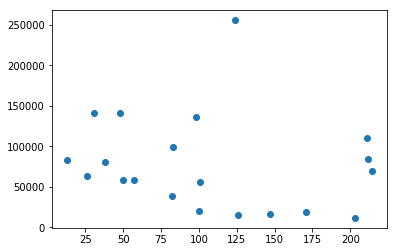

In [58]:
plt.scatter(df1['Water  depth  (feet)'],df1['Field               GOR (SCF/STB)   '])
plt.show()

## Don't forget your descriptive stats

In [59]:
df1.describe()

,Water depth (feet),Field GOR (SCF/STB),Proved Oil (MMbbl),Proved Gas (Bcf),Proved BOE (MMbbl),Cum Oil (MMbbl),Cum Gas (Bcf),Cum BOE (MMbbl),Rem Oil (MMbbl),Rem Gas (Bcf),Rem BOE (MMbbl)
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,106.750000,77989.000000,36.510000,1657.755000,331.500000,34.725000,1611.860000,321.530000,1.790000,45.900000,9.960000
std,67.035635,59291.467284,27.519675,611.285602,109.655777,25.849298,613.883646,110.099864,2.103356,34.972154,7.616768
min,13.000000,11544.000000,4.900000,896.300000,227.400000,4.800000,881.300000,215.400000,0.000000,7.900000,1.500000
25%,49.500000,34136.250000,14.325000,1313.650000,271.725000,13.175000,1250.775000,260.500000,0.450000,23.250000,5.775000
50%,99.000000,66974.000000,28.000000,1457.850000,306.550000,27.200000,1418.750000,293.500000,1.000000,37.400000,7.900000
75%,153.000000,101624.250000,52.475000,1668.400000,341.000000,51.650000,1651.925000,331.325000,2.350000,63.725000,13.425000
max,214.000000,255946.000000,91.200000,3201.400000,608.000000,85.800000,3155.000000,598.800000,8.200000,148.500000,34.700000


## Let's make a function that finds the correlations between every column value as pairs (basic linear regression)

In [60]:
col_correlations = df1.corr()  #shows the correlation coefficient betweeen every pair of columns
col_correlations

,Water depth (feet),Field GOR (SCF/STB),Proved Oil (MMbbl),Proved Gas (Bcf),Proved BOE (MMbbl),Cum Oil (MMbbl),Cum Gas (Bcf),Cum BOE (MMbbl),Rem Oil (MMbbl),Rem Gas (Bcf),Rem BOE (MMbbl)
Water depth (feet),1.000000,-0.174283,0.214040,-0.539322,-0.481300,0.203836,-0.522204,-0.470066,0.289306,-0.260673,-0.131364
Field GOR (SCF/STB),-0.174283,1.000000,-0.767674,0.088692,-0.104714,-0.775746,0.091297,-0.091663,-0.505101,-0.052292,-0.183212
Proved Oil (MMbbl),0.214040,-0.767674,1.000000,-0.094130,0.157607,0.998837,-0.105517,0.129885,0.803455,0.206698,0.392915
Proved Gas (Bcf),-0.539322,0.088692,-0.094130,1.000000,0.968282,-0.073938,0.998380,0.972893,-0.316847,-0.046276,-0.126658
Proved BOE (MMbbl),-0.481300,-0.104714,0.157607,0.968282,1.000000,0.177343,0.963815,0.997614,-0.112620,0.006013,-0.026985
Cum Oil (MMbbl),0.203836,-0.775746,0.998837,-0.073938,0.177343,1.000000,-0.083562,0.151934,0.773831,0.174241,0.358202
Cum Gas (Bcf),-0.522204,0.091297,-0.105517,0.998380,0.963815,-0.083562,1.000000,0.972238,-0.347703,-0.103035,-0.181550
Cum BOE (MMbbl),-0.470066,-0.091663,0.129885,0.972893,0.997614,0.151934,0.972238,1.000000,-0.163160,-0.061239,-0.095925
Rem Oil (MMbbl),0.289306,-0.505101,0.803455,-0.316847,-0.112620,0.773831,-0.347703,-0.163160,1.000000,0.565219,0.739803
Rem Gas (Bcf),-0.260673,-0.052292,0.206698,-0.046276,0.006013,0.174241,-0.103035,-0.061239,0.565219,1.000000,0.973176


* You will see that correlated variables have positive or negative values close to 1.0.
* A good example is ('Cum Oil (MMbbl)', 'Field               GOR (SCF/STB)   '): -0.7757463255169471
* This means that the cumulative oil produced so far in the well is inversely correlated to the Gas Oil Ratio (how much gas is produced with the oil)

## SNS Pair plotting is really good to visualize the above correlations.
Have a closer look and try to find some values that are correlated, maybe some are colinear?? (Proven oil and Cumulative oil?). This high colinearity is because this would be an ill-conditioned data pair

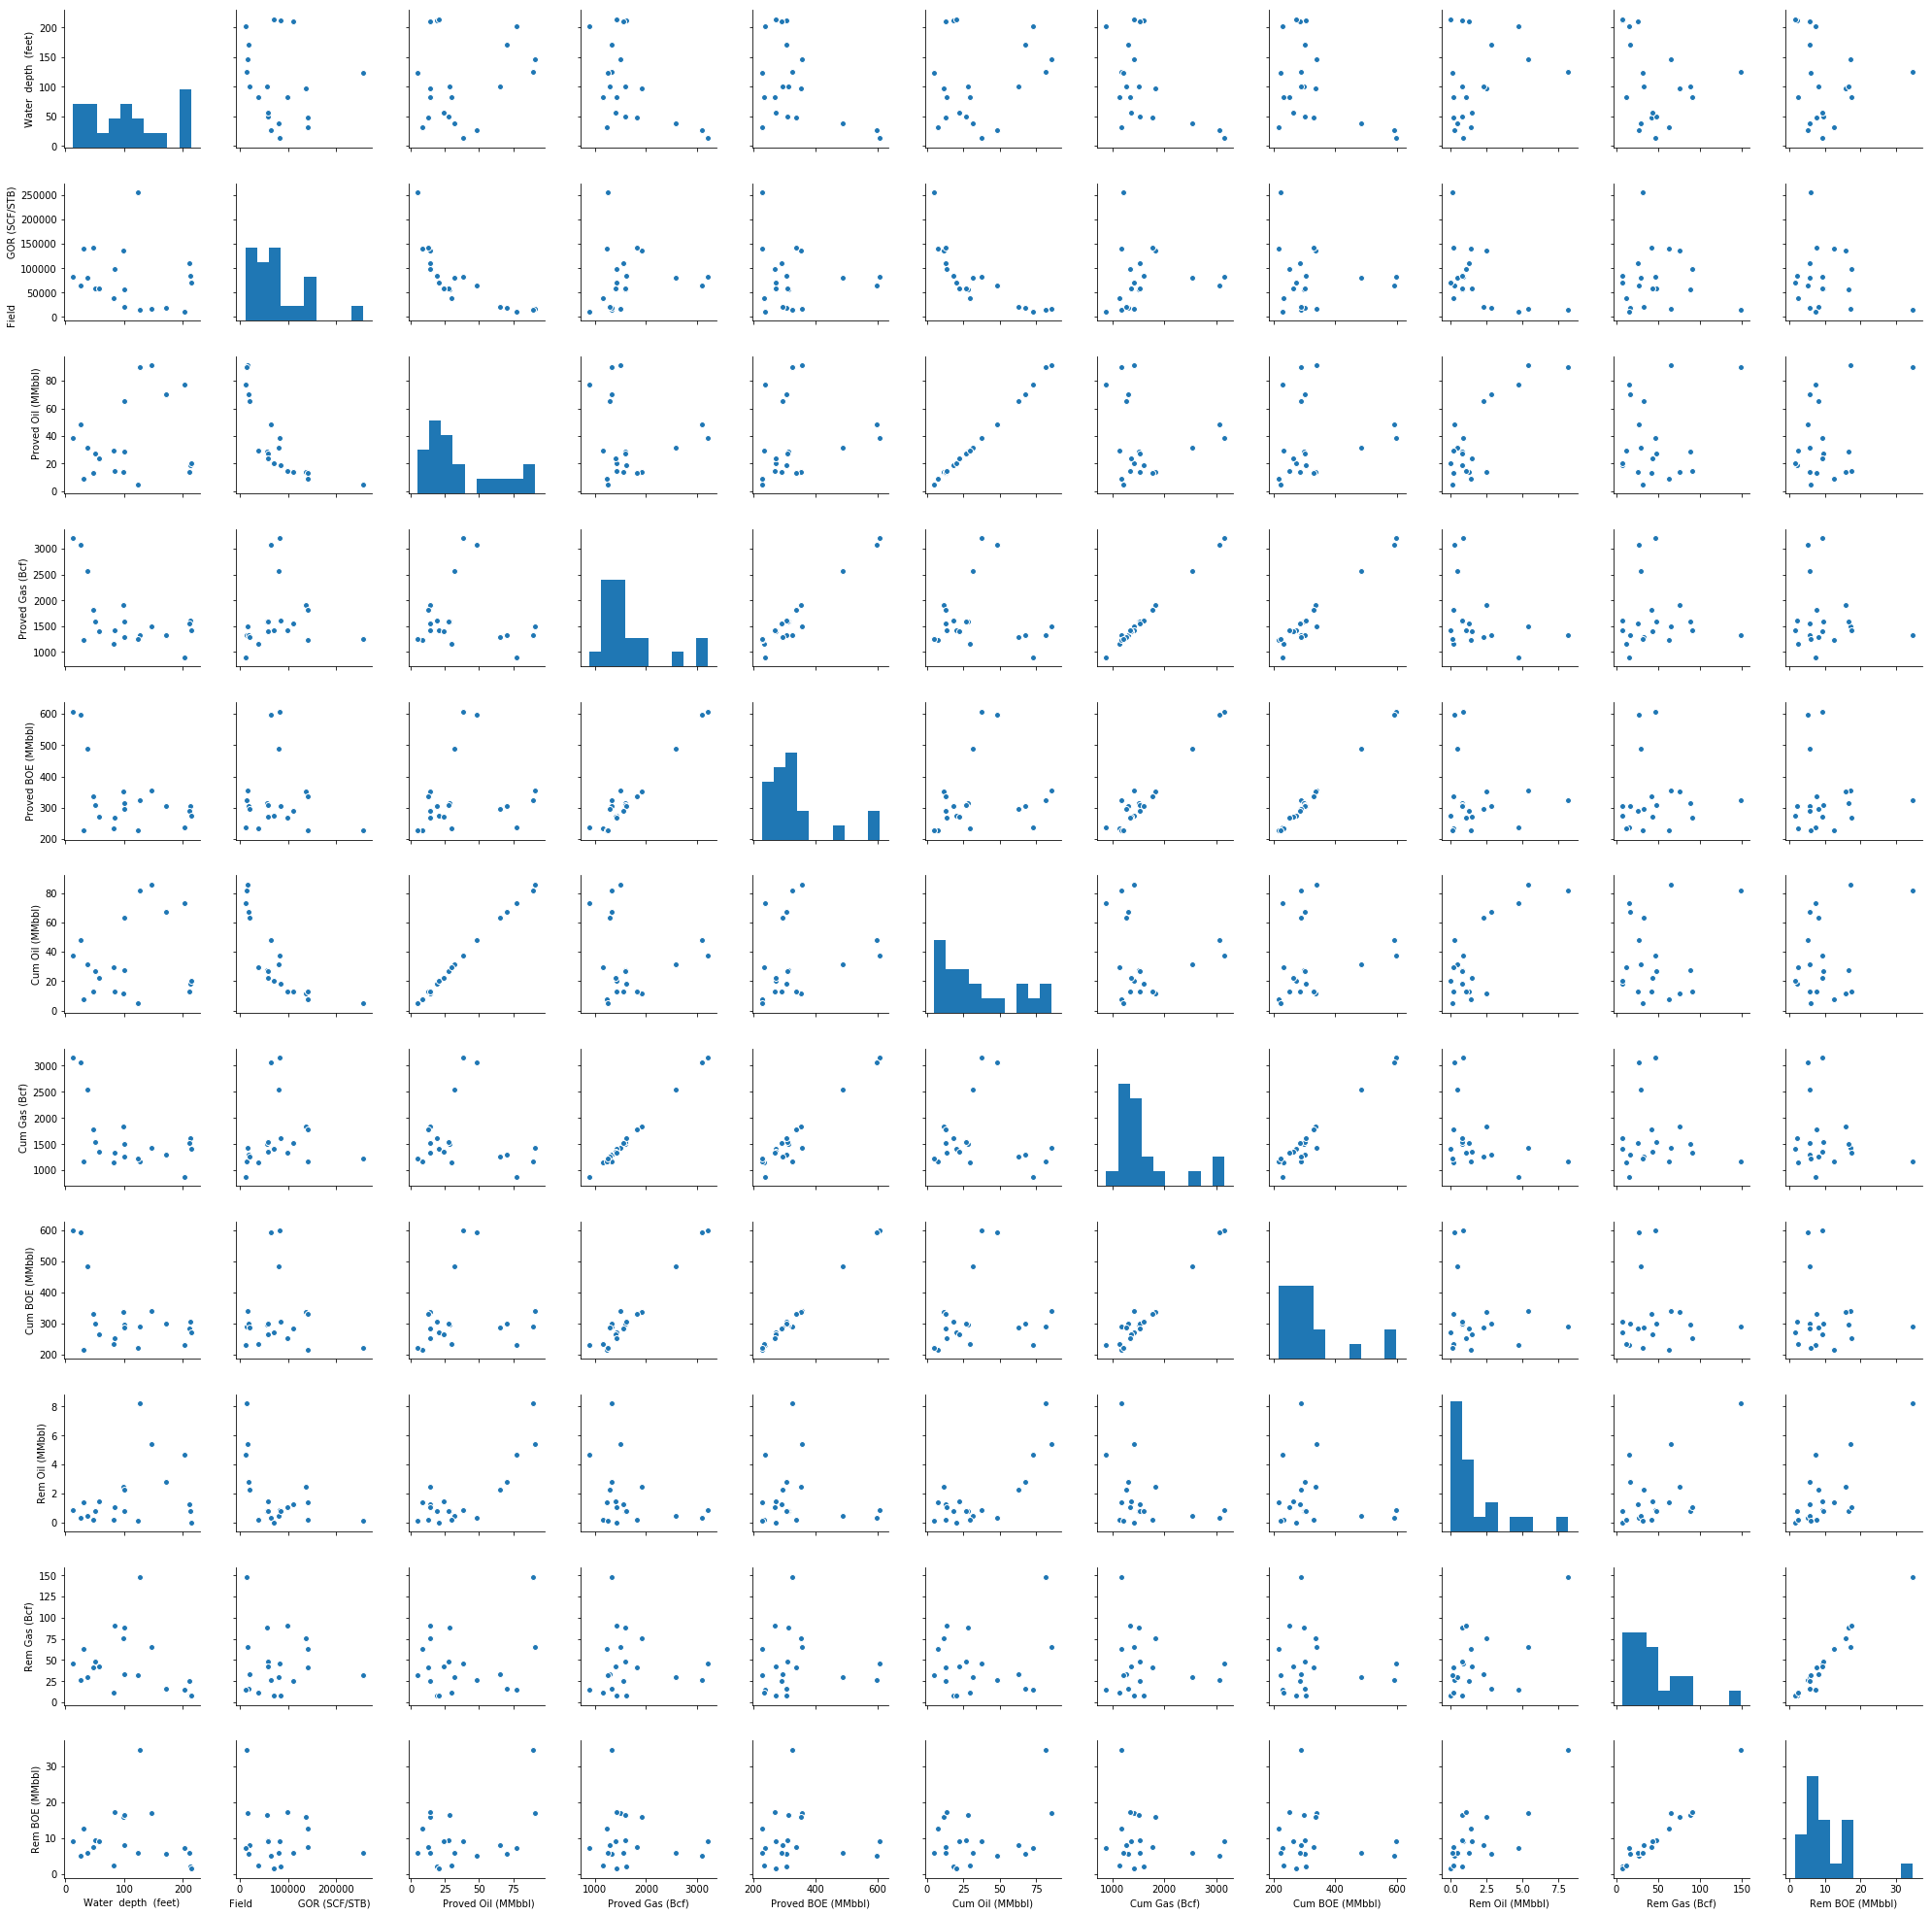

In [61]:
sns.pairplot(df1) #this plots every variable against every variable
plt.show()

## Lets create one final data frame focused on a few of the decently correlated columns

In [62]:
df2 = pd.DataFrame({"Rem_Oil":df1['Rem Oil (MMbbl)'],"GOR":df1['Field               GOR (SCF/STB)   '],"Cum_Oil":df1['Cum Oil (MMbbl)'],"Water_Depth":df1['Water  depth  (feet)']})

## Re-run the correlations function
we can see that Rem_Oil (the remaining oil in place in the reservoir) is negatively correlated to GOR and positively correlated to Cum_Oil (the cumulative amount of oil produced to date). Remaining oil is also very mildly correlated to Water depth. Maybe we should look closer.

In [63]:
df2.corr()

,Rem_Oil,GOR,Cum_Oil,Water_Depth
Rem_Oil,1.000000,-0.505101,0.773831,0.289306
GOR,-0.505101,1.000000,-0.775746,-0.174283
Cum_Oil,0.773831,-0.775746,1.000000,0.203836
Water_Depth,0.289306,-0.174283,0.203836,1.000000


## Pair plots are more clear now

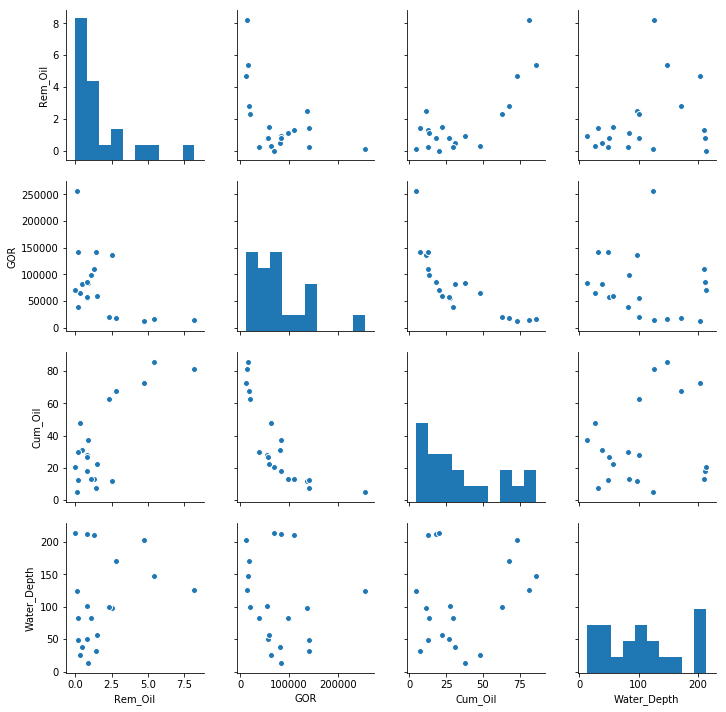

In [64]:
sns.pairplot(df2)
plt.show()

## Lets start with a simple linear regression of a single variable
X is our measurement, Y is the predicted value

Below we can see the summary, R-squared is 0.765, that is good. F is 61.86, which might be OK, it should be big. This model has 1 Degree of Freedom (Df Model). 

I would say this is model is okay.

In [65]:
X = df2[["Cum_Oil"]]   #this keeps X as a dataframe with only one column
y = df2["Rem_Oil"]     #y is a series

# Note the difference in argument order
model = smf.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rem_Oil   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     61.86
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.15e-07
Time:                        20:38:12   Log-Likelihood:                -33.920
No. Observations:                  20   AIC:                             69.84
Df Residuals:                      19   BIC:                             70.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cum_Oil        0.0555      0.007      7.865      0.000       0.041       0.070
==============================================================================
Omnibus:                        8.113   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                5.448
Skew:                           1.057   Prob(JB):                       0.0656
Kurtosis:                       4.438   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## t-statistic and F-statistic
* Recall that bootstrapping involves sampling with replacement, and evaluating the means of each realization of the bootstrapped sample. For brevity, I refer to this as the Bootstrapped mean.
* When the population size (N) is much greater than the sample size (n), the "standard error of the mean" (SE) is the ratio of the standard deviation of the original sample (s) to the square root of the bootstrapped sample size (n).
    * That is, SE = s/sqrt(n)
* The degrees of freedom (DF) is equal to the sample size (n) minus one. That is, DoF = n - 1.
* The test statistic is a t statistic (t) defined by the following equation: t = (x - μ) / SE.
    * where x is the sample mean, μ is the hypothesized population mean in the null hypothesis, and SE is the standard error.
* You can use the F statistic when deciding to support or reject the null hypothesis. 
* In your F test results, you can have both an F value and an F critical value.
* The F critical value is also called the "F statistic".
* The value you calculate from your data is called the F value (without the “critical” part).
* In general, if your calculated F value in a test is larger than your F statistic, you can reject the null hypothesis.
* If you only have the F statistic (F value has not been calculated), a higher value of F statistic indicates a high degree of significance of your results.
* See https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/ for more details on the F statistic




## Now lets do a multivariate linear regression with both GOR and Cumulative Oil to predict Remaining Oil
We can see that R-squared increased very slightly to 0.766, which is not very helpful. Now there are 2 degrees of freedom. F statistic went down, so this is a slightly worse model. GOR has a high P value, also this is not good.

This would be a bad model.

In [66]:
X = df2[["GOR","Cum_Oil"]]
y = df2["Rem_Oil"]

# Note the difference in argument order
model = smf.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rem_Oil   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     29.47
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.10e-06
Time:                        20:38:14   Log-Likelihood:                -33.876
No. Observations:                  20   AIC:                             71.75
Df Residuals:                      18   BIC:                             73.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GOR        -9.712e-07   3.45e-06     -0.281      0.782   -8.23e-06    6.29e-06
Cum_Oil        0.0563      0.008      7.206      0.000       0.040       0.073
==============================================================================
Omnibus:                        6.732   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.179
Skew:                           0.963   Prob(JB):                        0.124
Kurtosis:                       4.144   Cond. No.                     2.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## What if we added a third predictor, water depth
* The R-squared value goes up very slightly, which is appears to be good. However, the addition of more exploratory variables always tends to increase the R-squared value, even if the additional variable does not improve the model.
* This is why, we always prefer to use the adjusted R-squared value for multivariate regression.
* F goes even further down, which is bad. P value is high for GOR and water depth, meaning they are not good predictors. 
* This too is a bad model.

In [67]:
X = df2[["GOR","Cum_Oil","Water_Depth"]]
y = df2["Rem_Oil"]

# Note the difference in argument order
model = smf.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rem_Oil   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     18.84
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.20e-05
Time:                        20:38:17   Log-Likelihood:                -33.759
No. Observations:                  20   AIC:                             73.52
Df Residuals:                      17   BIC:                             76.51
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GOR         -2.059e-06   4.29e-06     -0.480      0.637   -1.11e-05       7e-06
Cum_Oil         0.0527      0.011      4.601      0.000       0.029       0.077
Water_Depth     0.0021      0.005      0.447      0.661      -0.008       0.012
==============================================================================
Omnibus:                        8.269   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.587
Skew:                           1.102   Prob(JB):                       0.0612
Kurtosis:                       4.358   Cond. No.                     3.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## What if we alter the GOR to log GOR
* We can see that it helps slightly, the R-squared goes up to .772, but F still goes down. 
* P has improved, but is still very high (should be less than 0.05 for significance).
* Therefore we would conclude that a single variable model (simple linear regression) would be best in this case. 

In [68]:
df2['log_GOR'] = np.log(df2['GOR'])
X = df2[["log_GOR","Cum_Oil"]]
y = df2["Rem_Oil"]

# Note the difference in argument order
model = smf.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rem_Oil   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     30.54
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.64e-06
Time:                        20:38:18   Log-Likelihood:                -33.603
No. Observations:                  20   AIC:                             71.21
Df Residuals:                      18   BIC:                             73.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_GOR       -0.0329      0.043     -0.761      0.456      -0.124       0.058
Cum_Oil        0.0619      0.011      5.592      0.000       0.039       0.085
==============================================================================
Omnibus:                        4.522   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.490
Skew:                           0.795   Prob(JB):                        0.288
Kurtosis:                       3.678   Cond. No.                         6.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='conductivity'></a>
# Another Data Set
## Reservoir Water Conductivity
* You can use the magnesium and calcium contents of water to predict the electrical conductivity.

In [69]:
cond = np.array([2.77,3.03,3.09,3.29,3.37,0.88,0.77,0.97,1.10,1.11,2.57,3.27,2.28,3.32,3.39,4.26])
mag = np.array([.0037,.041,.215,.166,.1,.031,.012,.017,.027,.039,.168,.172,.044,.069,.188,.211])
cal = np.array([1.342,1.5,1.332,1.609,1.627,.382,.364,.467,.487,.497,1.093,1.48,1.093,1.754,1.974,2.103])

df = pd.DataFrame({'Conductivity':cond,'Magnesium':mag,'Calcium':cal})
df

,Conductivity,Magnesium,Calcium
0,2.77,0.0037,1.342
1,3.03,0.0410,1.500
2,3.09,0.2150,1.332
3,3.29,0.1660,1.609
4,3.37,0.1000,1.627
5,0.88,0.0310,0.382
6,0.77,0.0120,0.364
7,0.97,0.0170,0.467
8,1.10,0.0270,0.487
9,1.11,0.0390,0.497


In [70]:
df.describe()

,Conductivity,Magnesium,Calcium
count,16.000000,16.000000,16.000000
mean,2.466875,0.093981,1.194000
std,1.129128,0.078388,0.589192
min,0.770000,0.003700,0.364000
25%,1.107500,0.030000,0.494500
50%,2.900000,0.056500,1.337000
75%,3.297500,0.169000,1.613500
max,4.260000,0.215000,2.103000


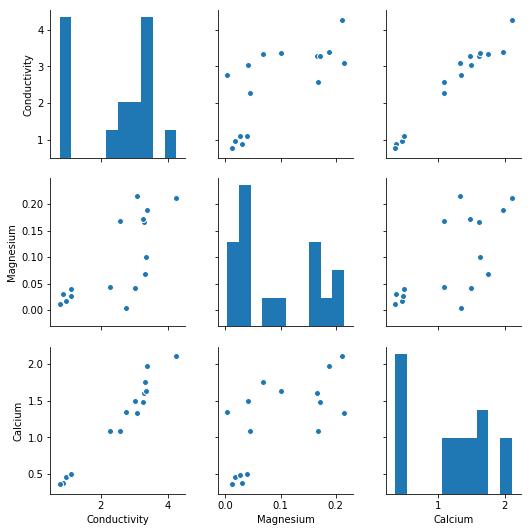

In [71]:
sns.pairplot(df)
plt.show()

## Predict the conductivity from the magnesium and calcium content. Fit the full model first order and second order models.

## First order model
$y=\beta_0+\beta_1x_1+\beta_2x_2+\epsilon$

In [90]:
X = df[["Magnesium","Calcium"]]
y = df["Conductivity"]

# Note the difference in argument order
model = smf.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Conductivity   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1120.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           3.57e-16
Time:                        20:53:18   Log-Likelihood:                 2.0645
No. Observations:                  16   AIC:                           -0.1290
Df Residuals:                      14   BIC:                             1.416
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Magnesium      1.4300      1.007      1.420      0.178      -0.730       3.590
Calcium        1.9164      0.092     20.841      0.000       1.719       2.114
==============================================================================
Omnibus:                       25.801   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.662
Skew:                          -2.353   Prob(JB):                     2.97e-08
Kurtosis:                       8.463   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
print(model.params)

Magnesium    1.430012
Calcium      1.916391
dtype: float64


## Create Second Order Model
$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_1^2+\beta_4x_2^2+\beta_5x_1x_2+\epsilon$

In [94]:
dfX = pd.DataFrame({'x1':df.Magnesium,'x2':df.Calcium,'x3':df.Magnesium**2,'x4':df.Calcium**2,'x5':df.Magnesium*df.Calcium})
dfX

,x1,x2,x3,x4,x5
0,0.0037,1.342,0.000014,1.800964,0.004965
1,0.0410,1.500,0.001681,2.250000,0.061500
2,0.2150,1.332,0.046225,1.774224,0.286380
3,0.1660,1.609,0.027556,2.588881,0.267094
4,0.1000,1.627,0.010000,2.647129,0.162700
5,0.0310,0.382,0.000961,0.145924,0.011842
6,0.0120,0.364,0.000144,0.132496,0.004368
7,0.0170,0.467,0.000289,0.218089,0.007939
8,0.0270,0.487,0.000729,0.237169,0.013149
9,0.0390,0.497,0.001521,0.247009,0.019383


In [98]:
lm = smf.OLS(y,dfX).fit()
print(lm.params)

x1     2.157705
x2     2.244333
x3    16.045749
x4    -0.135350
x5    -2.889316
dtype: float64


In [99]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Conductivity   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     862.0
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           7.08e-14
Time:                        21:36:38   Log-Likelihood:                 9.2021
No. Observations:                  16   AIC:                            -8.404
Df Residuals:                      11   BIC:                            -4.541
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1577      4.350      0.496      0.6

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<a id='sklearn'></a>
## Introduction to Machine Learning Using the Scikit Learn Package
* The scikit learn package is a very powerful machine learning package with several machine learning algorithms
* It contains simple and efficient tools for data mining and data analysis
* It is accessible to everybody, and reusable in various contexts
* It is built on NumPy, SciPy, and matplotlib
* It is open source
* It has implementations of bivariate and multivariate regression
* Some of the other machine learning algorithms implement in the Scikit learn package include polynomial regression, support vector regression, decision tree regression, random forest regression, logistic regression, etc.
* The syntax for using all of these regressors are very similar, so we show how to perform simple bivariate linear regression and multivariate regression below:

**Bivariate Linear Regression using Scikit learn**

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


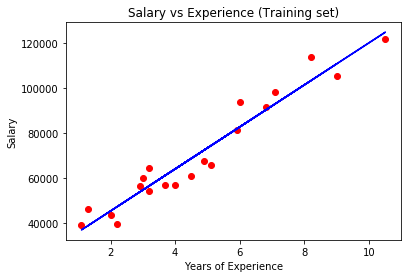

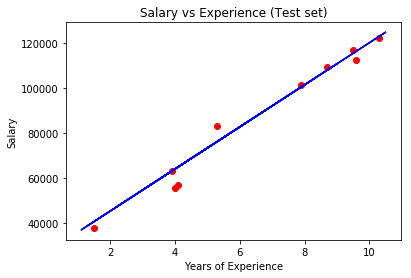

In [101]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()